In [33]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import itertools as it
from scipy.special import comb

import matplotlib
font = {'size'   : 11}
matplotlib.rc('font', **font)

In [34]:
data_s = np.loadtxt('/home/filipe/Documents/Simulator/Inference/synthmeasuresAuto_NOrder.txt')
data_d = np.loadtxt('/home/filipe/Documents/Simulator/Inference/synthmeasuresDense_NOrder.txt')
data_c = np.loadtxt('/home/filipe/Documents/Simulator/Inference/synthmeasuresContinuous_NOrder.txt')

data_s2 = np.loadtxt('/home/filipe/Documents/Simulator/Inference/synthmeasuresAuto_Skeleton.txt')
data_d2 = np.loadtxt('/home/filipe/Documents/Simulator/Inference/synthmeasuresDense_Skeleton.txt')
data_c2 = data_c*0

data_s3 = data_s*0
data_d3 = data_d*0
data_c3 = data_c*0

#data_s = np.loadtxt('/home/filipe/Documents/Simulator/3. Continuous_1.0/synthmeasuresContinuous_data.txt')
#data_d = np.loadtxt('/home/filipe/Documents/Simulator/3. Continuous_1.1/synthmeasuresContinuous_data.txt')
#data_c = np.loadtxt('/home/filipe/Documents/Simulator/3. Continuous_1.2/synthmeasuresContinuous_data.txt')

#data_s2 = np.loadtxt('/home/filipe/Documents/Simulator/3. Continuous_1.3/synthmeasuresContinuous_data.txt')
#data_d2 = np.loadtxt('/home/filipe/Documents/Simulator/2. Dense_3/synthmeasuresDense_data.txt')*0
#data_c2 = np.loadtxt('/home/filipe/Documents/Simulator/3. Continuous_2/synthmeasuresContinuous_data.txt')

#data_s3 = np.loadtxt('/home/filipe/Documents/Simulator/3. Continuous_3/synthmeasuresContinuous_data.txt')
#data_d3 = np.loadtxt('/home/filipe/Documents/Simulator/3. Continuous_5/synthmeasuresContinuous_data.txt')
#data_c3 = np.loadtxt('/home/filipe/Documents/Simulator/3. Continuous_10/synthmeasuresContinuous_data.txt')


print()

#Remove the outlier?
#outlier1 = data_c[1297]
#data_c = np.delete(data_c,(1297),axis=0)

#outlier2 = data_d[18]
#outlier3 = data_d[262]
#outlier4 = data_d[703]
#data_d = np.delete(data_d,(18,262,703),axis=0)

In [35]:
colors=['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
legends=['PC', 'FisherConnected', 'FisherKnee', 'NIConnected', 'NIKnee'] 
data=[data_s,data_d,data_c,data_s2,data_d2,data_c2]
title=['Discrete/Controlled','Discrete/Matrix','Continuous']*2
#title=['1.0','1.1','1.2','1.3','Nan','2','3','5','10']

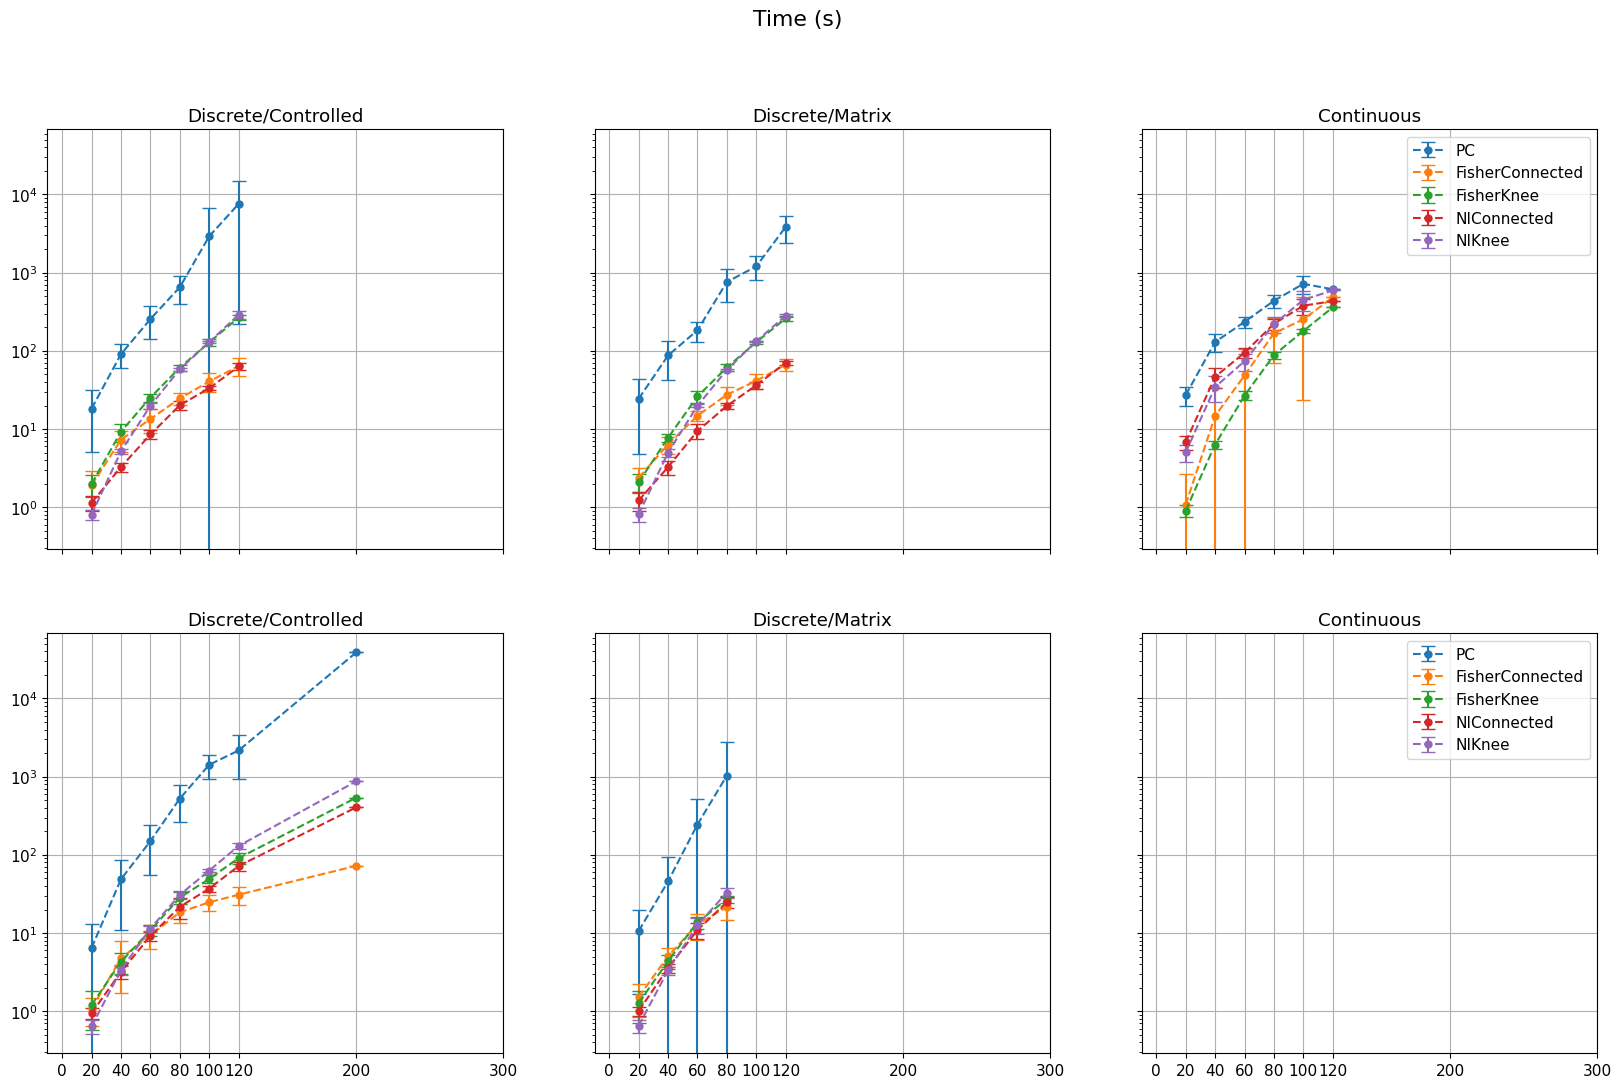

In [36]:
fig, axe = pl.subplots(nrows=2,ncols=3,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns=[2,8,14,20,26]
for j in range(6):
    n_nodes = np.unique(data[j][:,0]) ##number of nodes

    #Plot PC algorithm
    ydata_pc = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[0]]) for n_node in n_nodes])
    #axe[j].plot(n_nodes,n_nodes*0+1,marker='.',linestyle='--',color=colors[0],markersize=10,label=legends[0])
    error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node],axis=0))[columns[0]] for n_node in n_nodes])
    axe[j].errorbar(n_nodes,ydata_pc,yerr=error,marker='.',linestyle='--',ecolor=colors[0],markersize=10,label=legends[0],capsize=5)

    #Plot the remaining methods
    for i in range(1,5):
        ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]] + data[j][data[j][:,0]==n_node][:,29+i])
                          for n_node in n_nodes])
        error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]] + data[j][data[j][:,0]==n_node][:,29+i]))
                          for n_node in n_nodes])
        axe[j].errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',ecolor=colors[i],markersize=10,label=legends[i],capsize=5)
        
    axe[j].title.set_text(title[j])
    axe[j].grid()
axe[2].legend()
axe[5].legend()
#axe[2].plot(outlier1[0],outlier1[2],'x',color=colors[0])
#axe[1].plot(outlier2[0],outlier2[2],'x',color=colors[0])
#axe[1].plot(outlier3[0],outlier3[2],'x',color=colors[0])
#axe[1].plot(outlier4[0],outlier4[2],'x',color=colors[0])

pl.suptitle("Time (s)",fontsize="x-large")
pl.xticks(list(range(0,130,20))+[200,300])
pl.yscale("log")
pl.show()

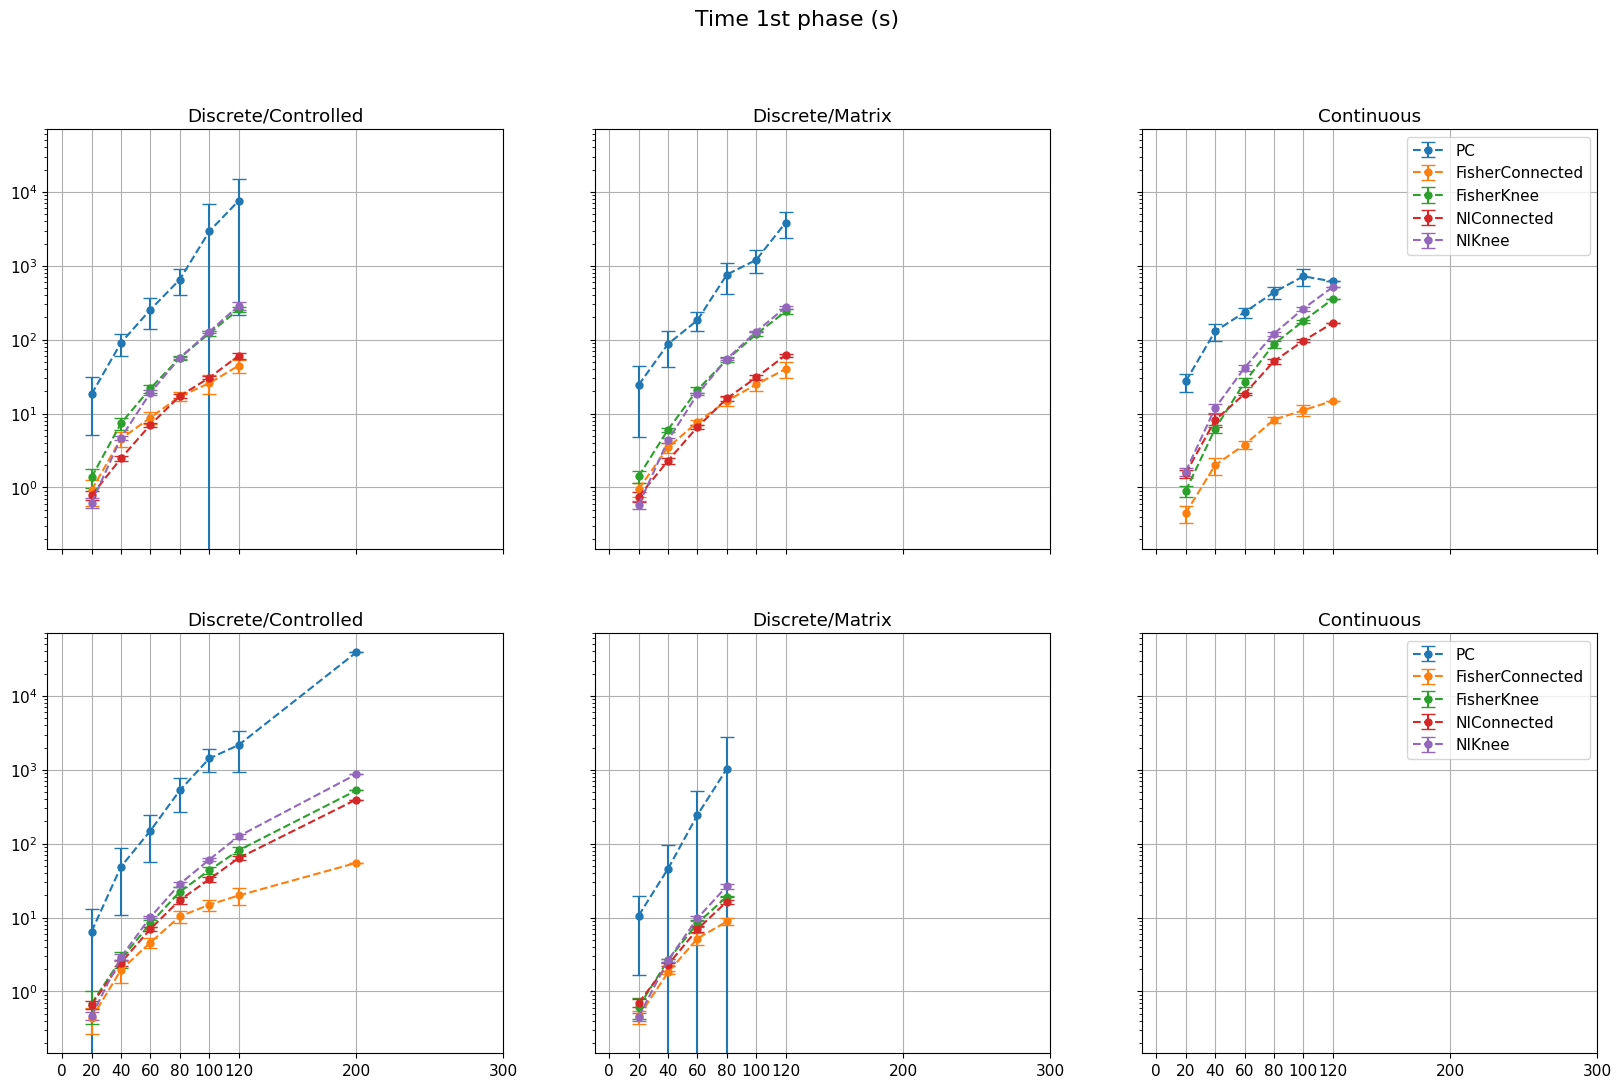

In [37]:
fig, axe = pl.subplots(nrows=2,ncols=3,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns=[2,8,14,20,26]
for j in range(6):
    n_nodes = np.unique(data[j][:,0]) ##number of nodes

    #Plot the remaining methods
    for i in range(5):
        ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                          for n_node in n_nodes])
        error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                          for n_node in n_nodes])
        axe[j].errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',ecolor=colors[i],markersize=10,label=legends[i],capsize=5)
        
    axe[j].title.set_text(title[j])
    axe[j].grid()
axe[2].legend()
axe[5].legend()

pl.suptitle("Time 1st phase (s)",fontsize="x-large")
pl.xticks(list(range(0,130,20))+[200,300])
pl.yscale("log")
pl.show()

'''
fig, axe = pl.subplots(nrows=2,ncols=3,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns=[2,30,31,32,33]
for j in range(6):
    n_nodes = np.unique(data[j][:,0]) ##number of nodes

    #Plot the remaining methods
    for i in range(5):
        ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                          for n_node in n_nodes])
        error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                          for n_node in n_nodes])
        axe[j].errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',ecolor=colors[i],markersize=10,label=legends[i],capsize=5)
        
    axe[j].title.set_text(title[j])
    axe[j].grid()
axe[2].legend()
axe[5].legend()

pl.suptitle("Time 2nd phase (s)",fontsize="x-large")
pl.xticks(list(range(0,130,20))+[200,300])
pl.yscale("log")
pl.show()
#'''
print()

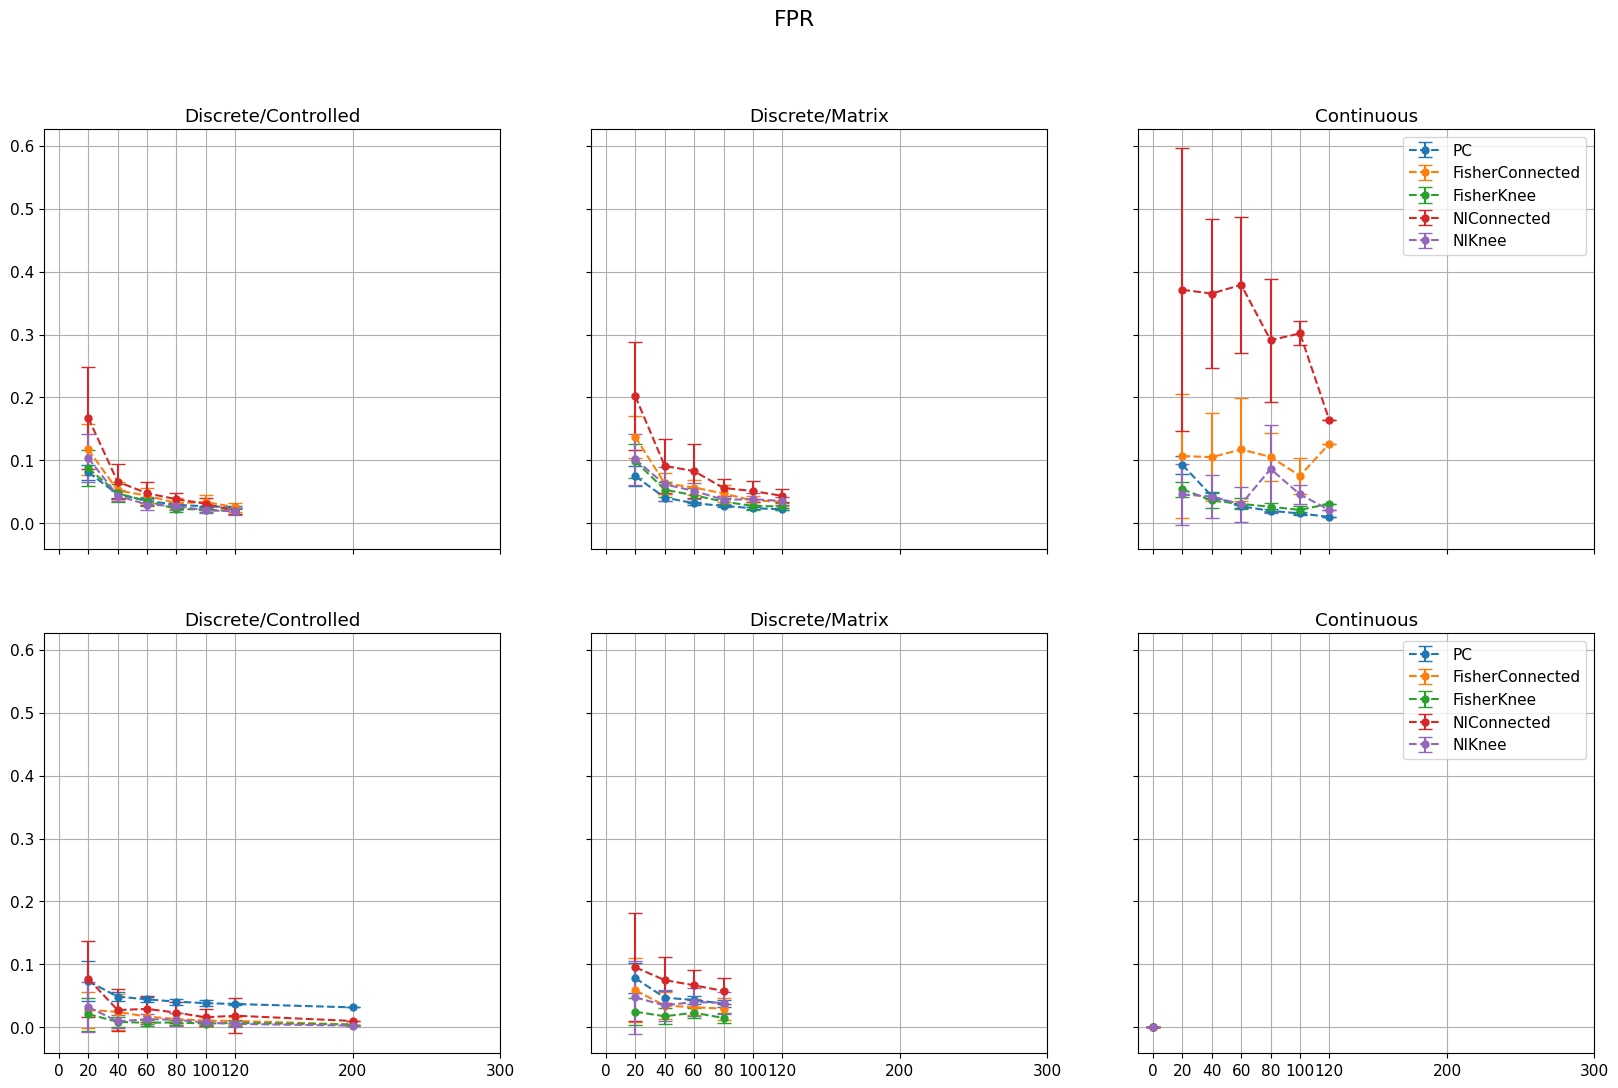

In [38]:
#False Positive Rate
fig, axe = pl.subplots(nrows=2,ncols=3,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns=[3,9,15,21,27]
for j in range(6):
    n_nodes = np.unique(data[j][:,0]) ##number of nodes

    for i in range(5):
        ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                          for n_node in n_nodes])
        error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                          for n_node in n_nodes])
        axe[j].errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',ecolor=colors[i],markersize=10,label=legends[i],capsize=5)

    axe[j].title.set_text(title[j])
    axe[j].grid()
axe[2].legend()
axe[5].legend()

pl.suptitle("FPR",fontsize="x-large")
pl.xticks(list(range(0,130,20))+[200,300])
#pl.ylim(0,0.2)
pl.legend()
pl.show()

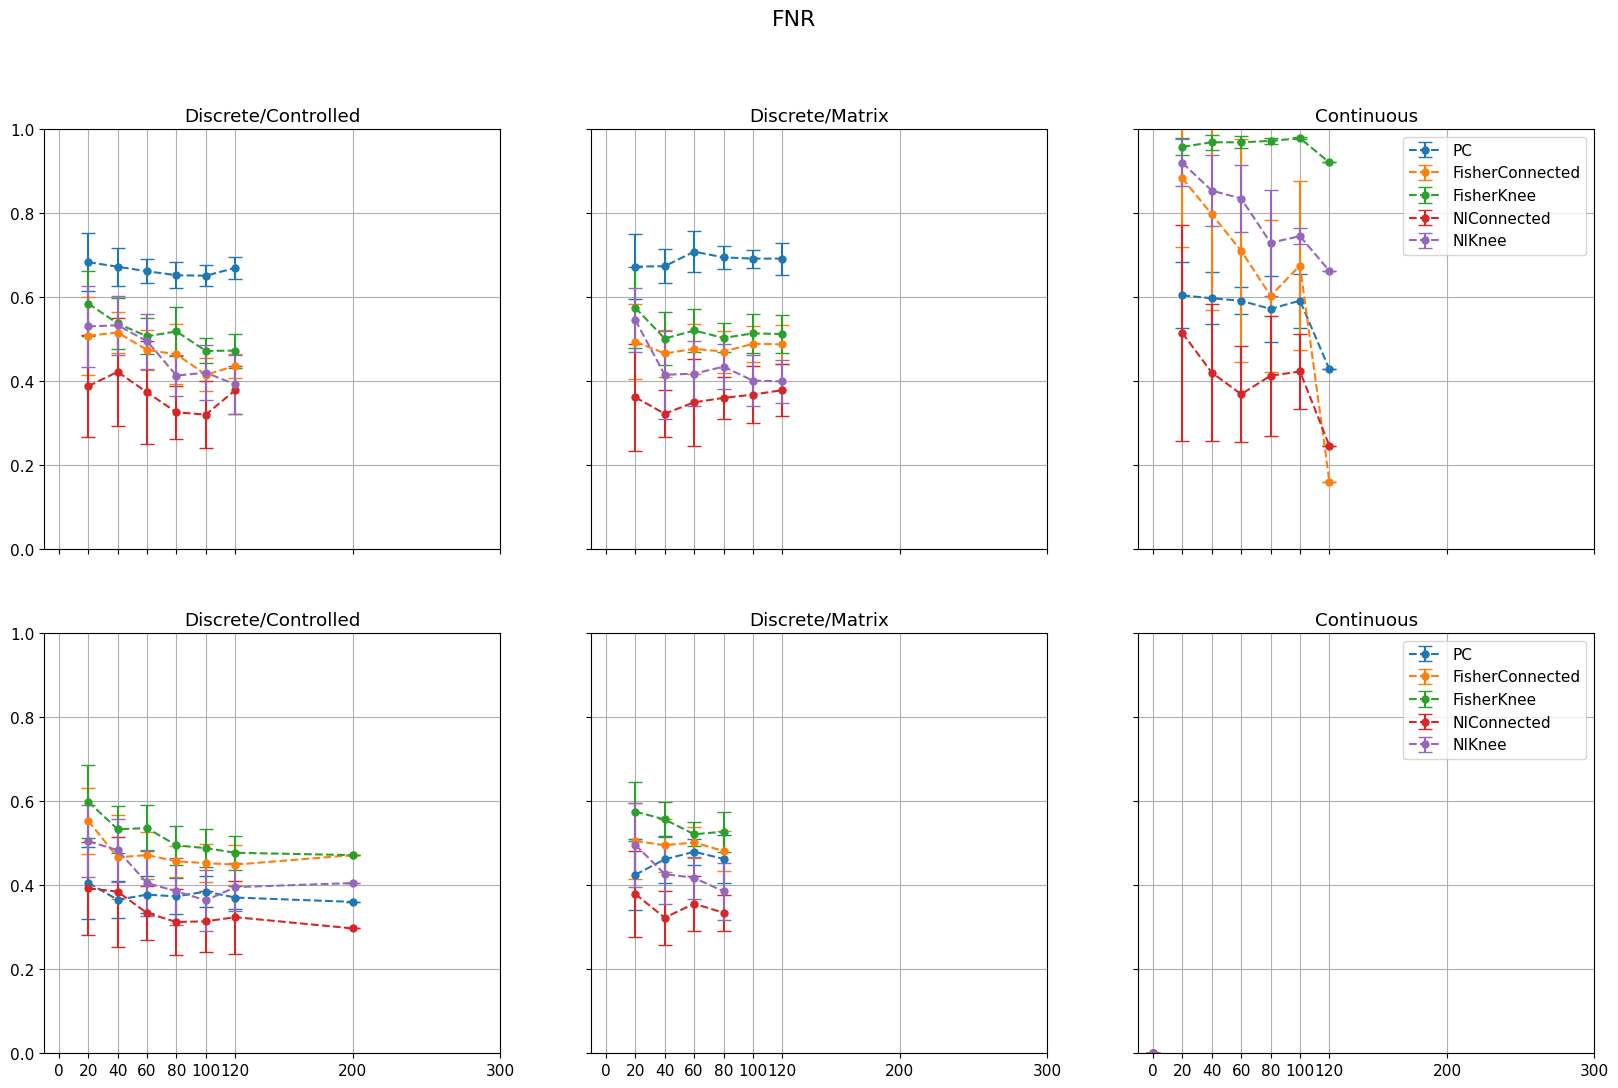

In [39]:
fig, axe = pl.subplots(nrows=2,ncols=3,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns=[4,10,16,22,28]
for j in range(6):
    n_nodes = np.unique(data[j][:,0]) ##number of nodes

    for i in range(5):
        ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                          for n_node in n_nodes])
        error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                          for n_node in n_nodes])
        axe[j].errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',ecolor=colors[i],markersize=10,label=legends[i],capsize=5)

    axe[j].title.set_text(title[j])
    axe[j].grid()
axe[2].legend()
axe[5].legend()

pl.suptitle("FNR",fontsize="x-large")
pl.xticks(list(range(0,130,20))+[200,300])
pl.ylim(0,1)
pl.show()

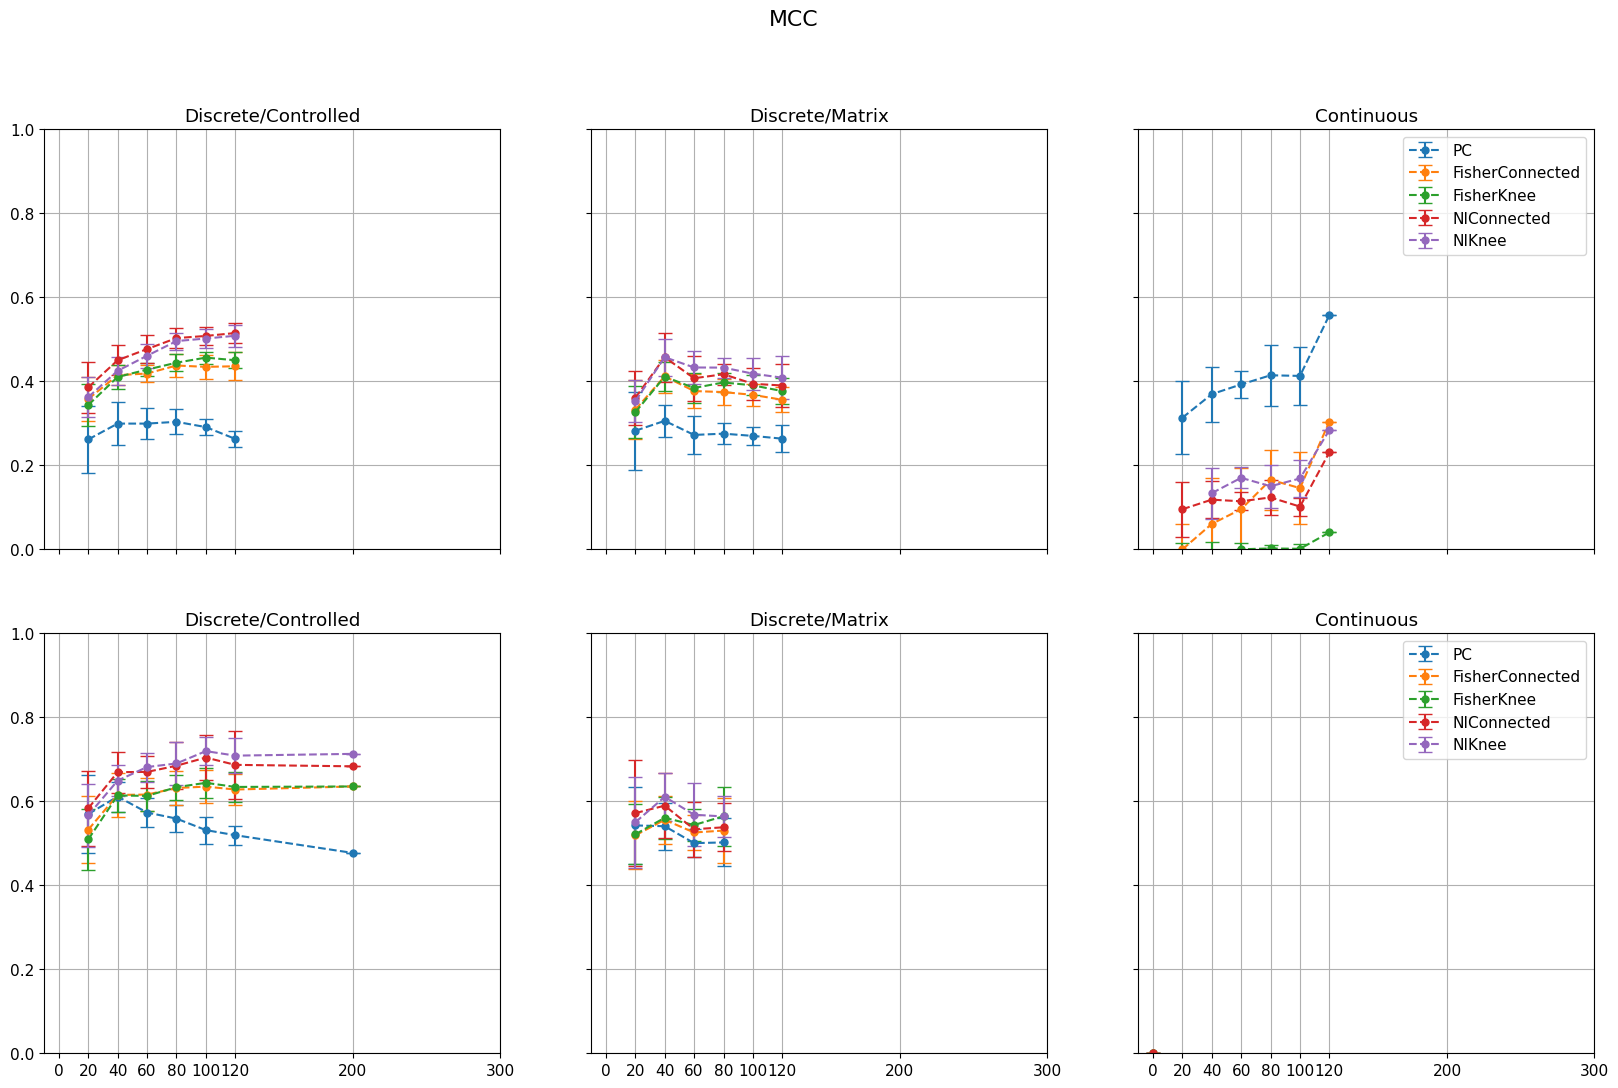

In [40]:
fig, axe = pl.subplots(nrows=2,ncols=3,sharey=True,sharex=True,figsize=(20,12))
axe = axe.flatten()
columns=[5,11,17,23,29]
for j in range(6):
    n_nodes = np.unique(data[j][:,0]) ##number of nodes

    for i in range(5):
        ydata = np.array([np.mean(data[j][data[j][:,0]==n_node][:,columns[i]])
                          for n_node in n_nodes])
        error = np.array([np.sqrt(np.var(data[j][data[j][:,0]==n_node][:,columns[i]]))
                          for n_node in n_nodes])
        axe[j].errorbar(n_nodes,ydata,yerr=error,marker='.',linestyle='--',ecolor=colors[i],markersize=10,label=legends[i],capsize=5)

    axe[j].title.set_text(title[j])
    axe[j].grid()
axe[2].legend()
axe[5].legend()

pl.suptitle("MCC",fontsize="x-large")
pl.xticks(list(range(0,130,20))+[200,300])
pl.ylim(0,1)
pl.show()